In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.mixture import GaussianMixture

In [19]:
images_folder_path = "../k-means-clustering/images/"
images = []

for f in os.listdir(images_folder_path):
    if f.lower().startswith(".ds") is True:
        continue
    file_path = os.path.join(images_folder_path, f)
    with Image.open(file_path) as img:
        img_array = np.asarray(img)
        print(f"File Name: {f}", end="\t\t")
        print(f"Image Array Shape: {img_array.shape}")

        images.append(img_array)

File Name: horse-9338907_1920.jpg		Image Array Shape: (1920, 1280, 3)
File Name: man-8493246_1280.jpg		Image Array Shape: (853, 1280, 3)
File Name: woman-8086721_1280.jpg		Image Array Shape: (1280, 853, 3)


In [ ]:
def plot_information_criteria(image: np.ndarray, n_components=range(3, 11)):
    """
    Plot AIC and BIC to determine optimal number of components
    in Gaussian Mixture
    """
    pixels = image.reshape((-1, 3))

    aic_scores = []
    bic_scores = []
    for n in n_components:
        print(f"Staring process with n_components={n}")
        gmm = GaussianMixture(
            n_components=n, random_state=0, covariance_type="full", verbose=1
        )
        gmm.fit(pixels)
        bic_scores.append(gmm.bic(pixels))
        aic_scores.append(gmm.aic(pixels))

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

    ax1.plot(n_components, aic_scores, "o-", label="AIC scores")
    ax1.set_ylabel("Scores")
    ax1.set_xlabel("n components")
    ax1.legend()
    ax2.plot(n_components, bic_scores, "s-", label="BIC scores")
    ax2.set_ylabel("Scores")
    ax2.set_xlabel("n components")
    ax2.legend()
    plt.show()

Staring process with n_components=3
Initialization 0
  Iteration 10
Initialization converged.
Staring process with n_components=4
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Staring process with n_components=5
Initialization 0
  Iteration 10
Initialization converged.
Staring process with n_components=6
Initialization 0
  Iteration 10
Initialization converged.
Staring process with n_components=7
Initialization 0
  Iteration 10
  Iteration 20
Initialization converged.
Staring process with n_components=8
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Staring process with n_components=9
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged.
Staring process with n_components=10
Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged.


/var/folders/kg/v4y5z1y10y3_vbnn8n65qt040000gn/T/ipykernel_39903/92023725.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


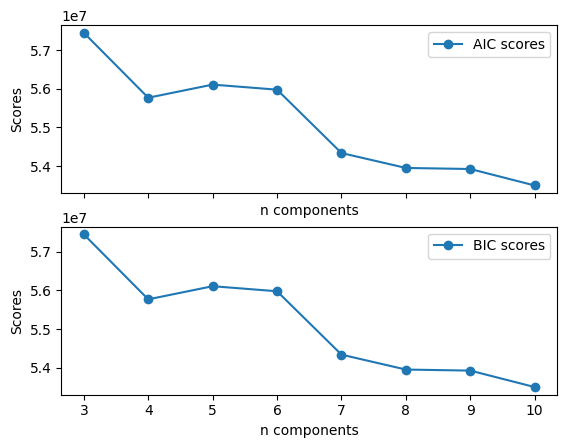

In [32]:
plot_information_criteria(images[0])